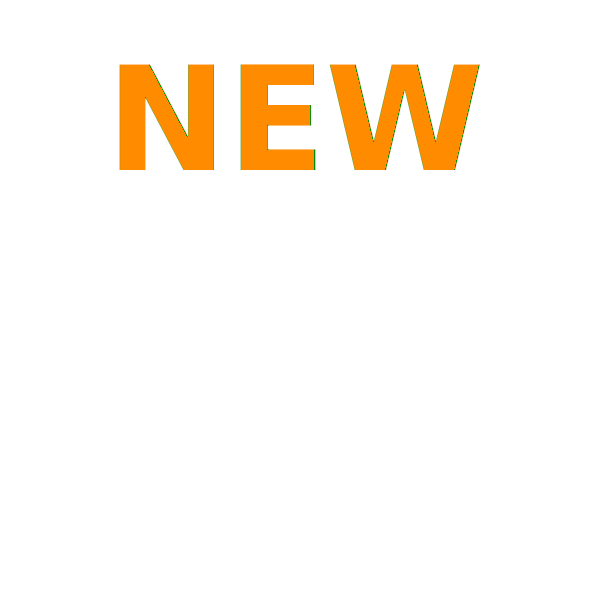

In [46]:
from IPython.display import SVG
from yattag import Doc

doc, tag, text = Doc().tagtext()

size = 600
with tag('svg', width=size, height=size):
    with tag('image', href='./recycle.png', width=size, height=size, opacity=0.8): pass
    with tag('text',
             ('font-size',"144"),
             ('font-weight','bold'),
             ('fill',"#ff8c00"),
             ('alignment-baseline','middle'),
             ('text-anchor','middle'),
             x=.5*size,
             y=.2*size,
    ): text('NEW')

SVG(doc.getvalue())

In [52]:
from math import pi

N: (60.000000000000114,136.30780618346938), 120°, (-0.4999999999999998,0.8660254037844388)
E: (151.67184270002528,95.49287217832625), 108°, (-0.30901699437494734,0.9510565162951536)
W: (249.8263376315264,74.62949022322874), 96°, (-0.10452846326765333,0.9945218953682734)
O: (350.17366236847363,74.6294902232288), 84°, (0.10452846326765344,0.9945218953682733)
R: (448.3281572999748,95.49287217832631), 72°, (0.30901699437494745,0.9510565162951535)
K: (540.0,136.3078061834695), 60°, (0.5000000000000001,0.8660254037844386)
A: (200.20238840747527,517.5108483522267), 258°, (-0.20791169081775981,-0.9781476007338056)
V: (299.9999999999999,528.0), 270°, (-1.8369701987210297e-16,-1.0)
E: (399.7976115925241,517.5108483522267), 282°, (0.20791169081775857,-0.9781476007338058)


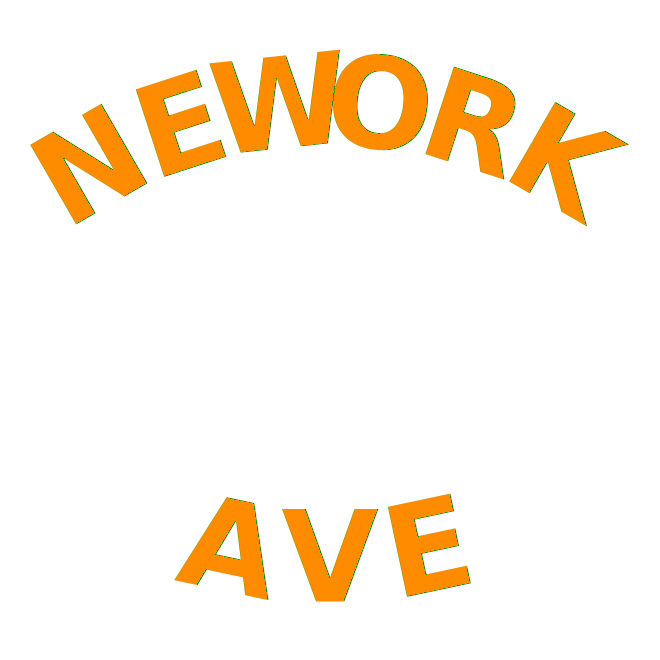

In [103]:
from IPython.display import SVG
from yattag import Doc

import math
from math import pi

def cos(deg): return math.cos(deg*pi/180)
def sin(deg): return math.sin(deg*pi/180)

def logo(
    size=600,
    buf=.05,
    font_size=.21,
    font_color='#ff8c00',
    deg_per_chr=12,
    cx=.5, cy=.92,
    R=.8,
):
    buf *= size
    font_size *= size
    cx *= size
    cy *= size
    R *= size

    doc, tag, text = Doc().tagtext()

    with tag('svg', width=size+2*buf, height=size+2*buf):
        with tag('g', transform=f'translate({buf},{buf})',):
            with tag('image', href='./recycle.png', width=size, height=size, opacity=0.8): pass
            txt = 'NEWORK'
            start_deg = 90 + deg_per_chr * (len(txt)-1)//2
            cx, cy = .5*size, .92*size
            R = .8*size
            for idx, char in enumerate(txt):
                deg = start_deg - idx * deg_per_chr
                x = cx + R * cos(deg)
                y = cy - R * sin(deg)
                print(f'{char}: ({x},{y}), {deg}°, ({cos(deg)},{sin(deg)})')
                with tag(
                    'text',
                    ('font-size',font_size),
                    ('font-weight','bold'),
                    ('fill',font_color),
                    ('alignment-baseline','middle'),
                    ('text-anchor','middle'),
                    transform=f'rotate({90-deg},{x},{y})',
                    x=x,
                    y=y,
                ):
                    text(char)

            txt = 'AVE'
            start_deg = 270 - deg_per_chr * (len(txt)-1)//2
            cx, cy = .5*size, size-cy
            R = .8*size
            for idx, char in enumerate(txt):
                deg = start_deg + idx * deg_per_chr
                x = cx + R * cos(deg)
                y = cy - R * sin(deg)
                print(f'{char}: ({x},{y}), {deg}°, ({cos(deg)},{sin(deg)})')
                with tag(
                    'text',
                    ('font-size',font_size),
                    ('font-weight','bold'),
                    ('fill',font_color),
                    ('alignment-baseline','middle'),
                    ('text-anchor','middle'),
                    transform=f'rotate({270-deg},{x},{y})',
                    x=x,
                    y=y,
                ):
                    text(char)

    return SVG(doc.getvalue())

In [5]:
def show_svg(xml):
    return SVG(xml)

In [6]:
show_svg('<image href="./recycle.png"></image>')

In [ ]:
def svg(data):
    return SVG(data)

In [16]:
SVG(data='<svg><circle r="10" cx="10" cy="10" fill="black"></circle><image href="./recycle.png" width="60" height="60"></image></svg>')